## Predicting Loan Default using - XGBoost Model

### Contex:
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.
The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regard to their contribution to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted.
The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on a loan payment or not.

### Goal
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


### Dataset:
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


### Metric Measure:
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.

### Data dictionary:
- ID (unique ID assigned to each applicant)
- loan_amount (loan amount ($) applied each applicant)
- loan_term (Loan duration in years)
- interest_rate (Applicable interest rate on Loan in %)
- loan_grade (Loan Grade Assigned by the bank)
- loan_subgrade (Loan SubGrade Assigned by the bank)
- job_experience (Number of years job experience )
- home_ownership (Status of House Ownership)
- annual_income (Annual income of the applicant)
- income_verification_status (Status of Income verification by the bank)
- loan_purpose (Purpose of loan)
- state_code (State code of the applicant's residence )
- debt_to_income (Ratio to total debt to income (total debt might include other loan aswell))
- delinq_2yrs (number of 30+ days delinquency in past 2 years)
- public_records (number of legal cases against the applicant)
- revolving_balance (total credit revolving balance)
- total_acc (total number of credit lines available in members credit line)
- interest_receive (total interest received by the bank on the loan)
- application_type (Whether the applicant has applied the loan by creating individuall or joint account)
- last_week_pay (How many months have the applicant paid the loan EMI already)
- total_current_balance (total current balance of all the accounts of applicant)
- total_revolving_limit (total revolving credit limit)
- default (status of loan amount, 1 = Defaulter, 0 = Non Defaulters))

## Let's start by importing necessary libraries

In [3]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Import Label Encoder
from sklearn import preprocessing


# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

## Loading the dataset

In [21]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# read the dataset for the training and testing set

train_df = pd.read_csv("/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/TrainingData.csv")

# load the testing dataset
test_df = pd.read_csv("/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/TestData.csv")

### Data Overview

In [23]:
# Make a copy of the training dataset
DHDLTrain = train_df.copy()

# Copying the tesing dataset
DHDLTest = test_df.copy()

In [47]:
DHDLTrain['loan_term'].unique()

array(['3 years', '5 years'], dtype=object)

#### Display the first rows of the dataset

In [24]:
# displaying the top rows of the training dataset
DHDLTrain.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,14257956,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


In [25]:
# Display the top rows of the testing dataset
DHDLTest.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.310,C,C2,<5 Years,MORTGAGE,73400.000,Not Verified,debt_consolidation,CA,14.620,0.000,0.000,22156,30.000,2290.240,INDIVIDUAL,87.000,128098.000,25800.000
1,66862420,12000,3 years,7.260,A,A4,10+ years,MORTGAGE,105000.000,Not Verified,credit_card,VA,11.380,0.000,0.000,7592,14.000,202.680,INDIVIDUAL,13.000,269396.000,23600.000
2,3637416,15000,3 years,14.330,C,C1,6-10 years,MORTGAGE,50000.000,Verified,debt_consolidation,TX,28.150,0.000,1.000,17983,19.000,1166.240,INDIVIDUAL,30.000,220135.000,34100.000
3,53682249,12000,3 years,9.990,B,B3,6-10 years,RENT,37000.000,Source Verified,credit_card,NJ,34.320,0.000,0.000,12262,18.000,635.060,INDIVIDUAL,35.000,39436.000,21700.000
4,53937165,20150,3 years,11.530,B,B5,<5 Years,RENT,75000.000,Source Verified,debt_consolidation,CA,26.740,1.000,0.000,8251,11.000,1232.840,INDIVIDUAL,31.000,52764.000,12000.000


### Checking the shapes of the dataset

In [26]:
# Shape of the training dataset
print("The shape of the tarining dataset", DHDLTrain.shape)

# print the shape of the testing dataset
print("The shape of the testing dataset", DHDLTest.shape)

The shape of the tarining dataset (93174, 23)
The shape of the testing dataset (39933, 22)


### Checking duplicates

In [27]:
# Check the duplicates in the training dataset
dup_T = train_df.duplicated().sum()
print("There are {} duplicates in the training dataset".format(dup_T))

# Check the duplicates in the testing dataset
d_test = test_df.duplicated().sum()
print("\nThere are {} duplicates in the test dataset".format(d_test))

There are 0 duplicates in the training dataset

There are 0 duplicates in the test dataset


- There are no duplicates in the dataset.

### Check the data types of the columns in the dataset.

In [28]:
DHDLTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

- We have only 9 continuous variables, 4 float and 4 integers
- All other variables are categorical
- Some variables have missing values - `job_experience`,`total_current_balaance`,`total_revolving_limit` and `last_week_pay`

### Statistical summary

In [29]:
# Check the statistical sumamry for training dataset
DHDLTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.000,35050211.389,24149262.074,70735.000,10859832.500,37107507.000,58598949.500,73519746.000
loan_amnt,93174.000,14733.861,8428.185,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,93174.000,13.233,4.369,5.320,9.990,12.990,16.200,28.990
annual_income,93173.000,75028.259,69454.784,1200.000,45000.000,64000.000,90000.000,9500000.000
debt_to_income,93174.000,18.128,8.563,0.000,11.930,17.640,23.890,672.520
delinq_2yrs,93172.000,0.317,0.881,0.000,0.000,0.000,0.000,22.000
public_records,93172.000,0.196,0.581,0.000,0.000,0.000,0.000,49.000
revolving_balance,93174.000,16854.469,23689.074,0.000,6433.000,11856.000,20745.000,2560703.000
total_acc,93172.000,25.249,11.855,1.000,17.000,24.000,32.000,119.000
interest_receive,93174.000,1747.264,2088.236,0.000,439.880,1070.755,2219.613,23172.310


**Observations**

- The mean laon amount requested by the customer is `~$14734` with `75%` of the customers seeking laon of less than `$20,000`.
- `interest_rate` mean for the loans offered by the comany is `~13%`, however some customers get `interest_rate` as high as `28%`
- There is a high variation on `annual_income` among the customers, with the lowest income at `$1,200` and highest at `$9.5M`
- The mean of `debt_to_income` is at `~18` with the lowest being at 0.0

In [30]:
# Statistical sumamry for categorical variables
DHDLTrain.describe(include="object").T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


**Observations**
- There are only types of `loan_term` with most customers taking laons for 3 years
- There are 7 `loan_grade` with loan_grade B being the mostly grade taken by the customers
- 3 categories of `job_expereince` with most employees with experience <5 years are the popular group in taking loans
- Most customers take loans for mortgages and majority of this group and inidivdual loans

#### Statistical summary of testing set

In [31]:
DHDLTest.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,39933.000,34811489.370,24217502.295,74301.000,10751721.000,36805086.000,58459985.000,73519693.000
loan_amnt,39933.000,14781.987,8427.845,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,39933.000,13.219,4.392,5.320,9.990,12.990,16.200,28.990
annual_income,39933.000,75264.800,56556.664,3300.000,45262.000,65000.000,90000.000,5000000.000
debt_to_income,39933.000,18.121,8.488,0.000,11.960,17.610,23.880,380.530
delinq_2yrs,39932.000,0.312,0.855,0.000,0.000,0.000,0.000,17.000
public_records,39932.000,0.192,0.558,0.000,0.000,0.000,0.000,23.000
revolving_balance,39933.000,17019.281,26129.745,0.000,6482.000,11949.000,20928.000,2568995.000
total_acc,39932.000,25.265,11.769,1.000,17.000,24.000,32.000,114.000
interest_receive,39933.000,1764.744,2095.443,0.000,441.470,1077.720,2260.990,21811.290


#### Drop the columns for ID

In [32]:
# Make a copy of the dtaasets
dTrain = DHDLTrain.copy()
dTest = DHDLTest.copy()

# drop the columns that will not be used in model developmen
dTrain = dTrain.drop(["ID"], axis=1)
dTest = dTest.drop(["ID"], axis=1)

# print the traing set head
dTrain.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


### Checking missing values

In [33]:
# Check missing valeus for the training dataset
print("Missing valeus check in Training dataset \n", dTrain.isna().sum())

# Checking the missing values in testing dataset
print("\nMissing valeus check in Testing dataset \n", dTest.isna().sum())

Missing valeus check in Training dataset 
 loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

Missing valeus check in Testing dataset 
 loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                

- Several variables have missing values in both training and testing datasets

#### Treating training set missing values

In [34]:
# identify the numeric and categrical columns

# Num columns for training dataset
numTrain_col = dTrain.select_dtypes(include=["number"]).columns
catTrain_col = dTrain.select_dtypes(exclude=["number"]).columns

# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy="mean")
dTrain[numTrain_col] = numeric_imputer.fit_transform(dTrain[numTrain_col])

# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy="most_frequent")
dTrain[catTrain_col] = categorical_imputer.fit_transform(dTrain[catTrain_col])

# print the training set after removing the missing values
dTrain.isna().sum()

,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,0
home_ownership,0
annual_income,0
income_verification_status,0
loan_purpose,0


#### Treating testset missing values

In [35]:
# identify the numeric and categrical columns

# Num columns for test dataset
numTest_col = dTest.select_dtypes(include=["number"]).columns
catTest_col = dTest.select_dtypes(exclude=["number"]).columns

# Impute missing values for numeric columns with mean
numeric_imputer = SimpleImputer(strategy="mean")
dTest[numTest_col] = numeric_imputer.fit_transform(dTest[numTest_col])

# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy="most_frequent")
dTest[catTrain_col] = categorical_imputer.fit_transform(dTest[catTest_col])

# print the training set after removing the missing values
dTest.isna().sum()

,0
loan_amnt,0
loan_term,0
interest_rate,0
loan_grade,0
loan_subgrade,0
job_experience,0
home_ownership,0
annual_income,0
income_verification_status,0
loan_purpose,0


### Data Preparation for modelling

**Encoding the dataset**

In [36]:
# Encoding Stirng labels to numeric
# Import Label Encoder
# Creating labelEncoder
le = preprocessing.LabelEncoder()

dTrain_En = dTrain.apply(preprocessing.LabelEncoder().fit_transform)

# Encoding test data
dTest_En = dTest.apply(preprocessing.LabelEncoder().fit_transform)

print("\nEncoded Training Dataset")
dTrain_En.head()


Encoded Training Dataset


,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,317,0,59,1,6,2,3,6327,0,1,26,2660,0,0,30383,19,1164,0,1,34836,2944,0
1,677,0,192,2,10,2,3,4760,2,1,39,3159,0,2,9420,23,57136,0,33,48499,471,0
2,597,0,23,0,3,2,0,8111,1,1,42,1962,3,0,13173,27,8184,0,4,47759,796,0
3,957,0,204,2,13,2,0,4368,2,1,23,3730,0,0,28603,35,30536,0,5,48181,2320,0
4,637,0,9,0,1,0,0,5418,1,0,42,884,0,0,22129,26,21529,0,13,11728,2893,0


#### Using Clasfier Technique to determine variables with effective colleration

In [37]:
# Determine features correlations
classifier = SelectKBest(score_func=f_classif, k=5)
fits = classifier.fit(dTrain_En.drop("default", axis=1), dTrain_En["default"])
x1 = pd.DataFrame(fits.scores_)
columns = pd.DataFrame(dTrain_En.drop("default", axis=1).columns)
fscores = pd.concat([columns, x1], axis=1)
fscores.columns = ["Attribute", "Score"]
fscores.sort_values(by="Score", ascending=False)

,Attribute,Score
18,last_week_pay,6936.486
11,debt_to_income,1773.495
1,loan_term,1623.673
0,loan_amnt,835.945
16,interest_receive,799.919
9,loan_purpose,382.612
4,loan_subgrade,337.000
3,loan_grade,335.615
14,revolving_balance,306.220
19,total_current_balance,271.636


**Observations**
- `last_week_pay`, `debt_to_income`, `loan_term`, `loan_amount`, `interest_receive` has high correlation to loan default rate

### Model Building

#### Model evaluation criterion

#### We will be using Recall as a metric for our model performance because here company could face 2 types of losses
1. Could Give loan to defaulters - Loss of money
2. Not give Loan to non-defaulters - Loss of opportunity

#### Which Loss is greater?
* Giving loan to defaulters i.e Predicting a person not at risk, while actually person is at risk of making a default.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

In [38]:
#Final train and test dataset
dTrain_En.to_csv("/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/fdata/FinalTrain.csv", index=False)
dTest_En.to_csv("/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/fdata/FinalTest.csv", index=False)

In [2]:
import pandas as pd
dTrain_En = pd.read_csv("/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/fdata/FinalTrain.csv")

In [4]:
# Definr the train set data into X and y
X = dTrain_En.drop("default", axis=1)
Y = dTrain_En["default"]

# creating dummy variables
# X = pd.get_dummies(X, drop_first=True)

# X_test = pd.get_dummies(dTest_En, drop_first=True)
# Adding a constant to
# X = sm.add_constant(X)

# splitting dataset into training and validation sest
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=1)


# Display of the dataset a
print("Shape of Training set : ", X_train.shape)
print("Shape of validation set : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (65221, 21)
Shape of validation set :  (27953, 21)
Percentage of classes in training set:
default
0   0.762
1   0.238
Name: proportion, dtype: float64
Percentage of classes in validation set:
default
0   0.764
1   0.236
Name: proportion, dtype: float64


#### Functions for metric output and confusion matric

In [5]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [6]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining the model scorer

In [12]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#### Build Models and compare models

In [10]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To tune different models
from sklearn.model_selection import GridSearchCV

# To help with model building

In [14]:
models = []  # Empty list to store all the models

# Define the model
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
#models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
#models.append(("Logistic Regression", LogisticRegression(random_state=1)))
#models.append(("SVC", SVC(probability=True, random_state=1)))
models.append(("Extra Trees", ExtraTreesClassifier(random_state=1)))
#models.append(("K-Nearest Neighbors", KNeighborsClassifier()))
#models.append(("Naive Bayes", GaussianNB()))
#models.append(("Adaboost", AdaBoostClassifier(random_state=1))) # Removed eval_metric
#models.append(("Decision Tree", DecisionTreeClassifier(random_state=1))) # Removed eval_metric

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Xgboost: 87.39669502015116
Extra Trees: 81.5488948041414

Validation Performance:

Xgboost: 0.5979381443298969
Extra Trees: 0.2757731958762887


### Model for Testing

#### Hyper tuning XGBoost model

In [15]:
# definring model
xgb = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.8410481562595169:


In [16]:
# Creating XGboost Pipeline with the best parameters

xgb_tuned = XGBClassifier(
    random_state=1,
    scale_pos_weight=10,
    learning_rate=0.1,
    gamma=3,
    subsamples=0.8,
    n_estimators=150,
)

# Fit the xgboost_model
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [17]:
# Calculate metrics on train test
xgb_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)

print("Tuned XGBoost Performance on Training Set")
xgb_model_train_perf

Tuned XGBoost Performance on Training Set


,Accuracy,Recall,Precision,F1
0,0.698,0.966,0.439,0.603


In [18]:
# Calculate the metrics on validation dataset using original dataset
xgb_model_val_perf = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation Performance")
xgb_model_val_perf

Validation Performance


,Accuracy,Recall,Precision,F1
0,0.671,0.920,0.411,0.569


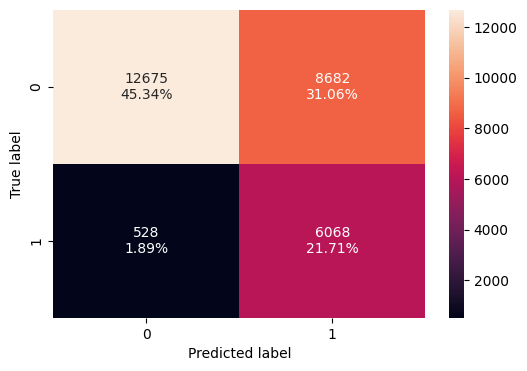

In [19]:
# Create Decision Tree confusion matrix on validation in original data
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

**Observations**
- Imporved model performance with hyper tuned XGBoost with `Accuracy` of `~90%`

### Model performance on the test data

In [39]:
#  Make Predictions using the test dataset

y_pred = xgb_tuned.predict(dTest_En)

# Select only the "ID" column from dTest_En
#pTest = dTest_En[['ID']].copy()

# Create a DataFrame with "ID" and "Predicted_Labels"
#res = pd.concat([pTest, pd.Series(y_pred, name='Predicted_Labels')], axis=1)

res = pd.concat([dTest_En, pd.Series(y_pred, name='Predicted_Labels')], axis=1)


# Save the DataFrame to a CSV file
res.to_csv("ModelPredictionsResult.csv", index=False)


#### Encoding original test dataset

In [40]:
le = preprocessing.LabelEncoder()

# Encoding test data
dEn = DHDLTest.apply(preprocessing.LabelEncoder().fit_transform)

print("\nEncoded Training Dataset")
dEn.head()


Encoded Training Dataset


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,5743,432,0,239,2,11,2,0,2703,0,1,4,1427,0,0,16009,29,24368,0,29,19429,692
1,35587,432,0,22,0,3,0,0,3640,0,0,44,1103,0,0,5862,13,3077,0,4,28012,628
2,4772,550,0,202,2,10,1,0,1557,2,1,42,2780,0,1,13704,18,16332,0,10,25541,922
3,27915,432,0,69,1,7,1,4,831,1,0,30,3395,0,0,9707,17,9924,0,12,10291,572
4,28122,752,0,111,1,9,2,4,2773,1,1,4,2639,1,0,6425,10,16978,0,11,12915,261


In [41]:
#Load the test result data

modelTestResult = pd.read_csv("ModelPredictionsResult.csv")


# Add 'ID' column back to the DataFrame
modelTestResult['ID'] = DHDLTest['ID']

# Save the updated DataFrame to a new CSV file with IDs
modelTestResult.to_csv('model_output_with_id.csv', index=False)

# Make the final dataset with prediction and IDs only
fSub =  modelTestResult[["ID", "Predicted_Labels"]]
fSub = fSub.rename(columns={'Predicted_Labels': 'default'})
#Save the final file

fSub.to_csv('FinalPredictions.csv')

In [42]:
#load finalpredictions sample
fSub.head(10)

,ID,default
0,4855329,1
1,66862420,1
2,3637416,1
3,53682249,0
4,53937165,0
5,1464149,1
6,7429943,0
7,10047245,1
8,46816125,0
9,57125517,0


In [61]:
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/PGP_Data Science _ Business Analytics/Model Hackathorns/xgboost_model.sav'
pickle.dump(xgb_tuned, open(filename, 'wb'))

In [44]:
lmodel = pickle.load(open(filename, 'rb'))

In [46]:
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder

# ... (rest of your code)

# Load the model
lmodel = pickle.load(open(filename, 'rb'))

#input_data2 =[12000,'3 years',15.31,'C','C2','<5 Years','MORTGAGE',73400,'Not Verified','debt_consolidation','CA',14.62,0,0,22156,30,2290.24,'INDIVIDUAL',87,128098,25800]
input_data2 =[12000,'3 years',9.99,'B','B3','6-10 years','RENT',37000,'Source Verified','credit_card','NJ',34.32,0,0,12262,18,635.06,'INDIVIDUAL',35,39436,21700]
#input_data = ['9000','3 years',9.17,'B','B2','<5 Years','OWN',85000,'Not Verified','debt_consolidation','NC',26.68,0,0,39519,20,59.6,'INDIVIDUAL',4,95493,84100]
# Identify string columns (assuming you know which ones are strings)
string_columns = [1, 3, 4, 5, 6, 8, 9, 10, 17]

# Encode string columns to numerical values
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    input_data2[col] = le.fit_transform([input_data2[col]])[0]  # Fit and transform on the single value
    label_encoders[col] = le  # Store the encoder for later use if needed

# Convert to NumPy array and reshape
input_data_as_numpy_array = np.asarray(input_data2)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Now predict
prediction = lmodel.predict(input_data_reshaped)
print(prediction)

[0]


In [ ]:
# Load the model
lmodel = pickle.load(open(filename, 'rb'))

input_data = ['9000','3 years',9.17,'B','B2','<5 Years','OWN',85000,'Not Verified','debt_consolidation','NC',26.68,0,0,39519,20,59.6,'INDIVIDUAL',4,95493,84100]
# Identify string columns (assuming you know which ones are strings)
string_columns = [1, 3, 4, 5, 6, 8, 9, 10, 17]

# Encode string columns to numerical values
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    input_data[col] = le.fit_transform([input_data[col]])[0]  # Fit and transform on the single value
    label_encoders[col] = le  # Store the encoder for later use if needed

# Convert ALL string representations of numbers to numeric types
for i in range(len(input_data)):
    if isinstance(input_data[i], str):
        try:
            input_data[i] = float(input_data[i])  # Try to convert to float
        except ValueError:
            pass  # If it's not a number, leave it as a string (already encoded)

# Convert to NumPy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Now predict
prediction = lmodel.predict(input_data_reshaped)
print(prediction)

In [51]:
DHDLTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [60]:
DHDLTrain['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [ ]:
def main():
    st.title("Loan Application Details")

    # User input form
    with st.form("loan_application_form"):
        st.header("Enter Loan Application Information")

        # Input fields for loan application details
        loan_amnt = st.text_input("Loan Amount ($) Applied by Applicant")

        loan_term = st.selectbox("Loan Term", ("3 Years", "5 Years"))

        interest_rate = st.text_input("Interest Rate (%)")

        loan_grade = st.selectbox("Loan Grade",("A","B","C","D","E","F","G"))

        loan_subgrade = st.selectbox("Loan Subgrade",('B2', 'C1', 'A4', 'C4', 'A2', 'C2', 'B4', 'A5', 'E2', 'B5', 'A3',
       'C5', 'E5', 'B1', 'D5', 'D4', 'E3', 'B3', 'C3', 'D3', 'A1', 'F5',
       'E1', 'E4', 'F3', 'D1', 'G3', 'F2', 'D2', 'F4', 'F1', 'G1', 'G5',
       'G2', 'G4'))

        job_experience = st.selectbox("Years of Job Experience",('<5 Years','10+ years', '6-10 years'))

        home_ownership = st.selectbox("Home Ownership Status",('OWN', 'MORTGAGE', 'RENT', 'NONE', 'OTHER'))

        annual_income = st.select("Annual Income ($)")

        income_verification_status = st.selectbox("Income Verification Status",('Not Verified', 'Verified', 'Source Verified'))

        loan_purpose = st.selectbox("Purpose of the Loan",('debt_consolidation', 'credit_card', 'other', 'home_improvement'))

        state_code = st.selectbox("State Code",('NC', 'SC', 'TX', 'MO', 'IL', 'NY', 'CT', 'CA', 'VA', 'GA', 'OR',
       'NV', 'LA', 'RI', 'IN', 'AZ', 'OK', 'MN', 'WY', 'HI', 'MI', 'CO',
       'MS', 'NJ', 'WA', 'UT', 'NM', 'KY', 'MA', 'FL', 'PA', 'WI', 'OH',
       'DE', 'DC', 'WV', 'MD', 'TN', 'NE', 'AL', 'KS', 'SD', 'VT', 'MT',
       'AK', 'AR', 'NH', 'ME', 'ND', 'ID'))

        debt_to_income = st.text_input("Debt-to-Income Ratio")

        delinq_2yrs = st.text_input("Number of Delinquencies in Last 2 Years")

        public_records = st.text_input("Public Records on File")

        revolving_balance = st.text_input("Revolving Balance ($)")

        total_acc = st.text_input("Total Accounts")

        interest_receive = st.text_input("Interest Received ($)")

        application_type = st.selectbox("Application Type",('INDIVIDUAL', 'JOINT'))

        last_week_pay = st.text_input("Last Week's Pay")

        total_current_balance = st.text_input("Total Current Balance ($)")

        total_revolving_limit = st.text_input("Total Revolving Credit Limit ($)")

        # Submit button
        submitted = st.form_submit_button("Submit Application")

        # When the form is submitted
        if submitted:
            st.success("Application submitted successfully!")

if __name__ == "__main__":
    main()
